In [2]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
nltk.download('stopwords')
nltk.download('punkt')

In [42]:
# Load data

df = pd.read_csv('E:/new/IUBH/Courses/22-nlp/data/raw_complaints.csv')


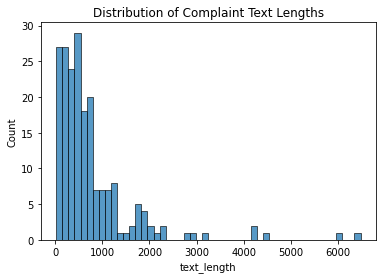

In [43]:
# Check the distribution of complaint text lengths
df['text_length'] = df['Consumer complaint narrative'].str.len()
sns.histplot(x='text_length', data=df, bins=50)
plt.title('Distribution of Complaint Text Lengths')
plt.show()

In [44]:
# Remove missing values
df.dropna(subset=['Consumer complaint narrative'], inplace=True)

In [45]:
# Define functions for text cleaning and tokenization
def clean_text(text):
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.casefold() not in stop_words]
    # Lemmatize using spaCy
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(' '.join(filtered_words))
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)

In [46]:
# Apply text cleaning and tokenization to complaint text
df['clean_text'] = df['Consumer complaint narrative'].apply(clean_text)

In [ ]:
# Save cleaned data to file
df.to_csv('E:/new/IUBH/Courses/22-nlp/data/complaints_clean.csv', index=False)